# 소프트맥스 회귀

- 다중 클래스 분류(Multi-Class classification)

## 1) 원핫 인코딩

- 선택지의 개수만큼의 차원, 선택지 인덱스에 해당하는 원소에는 1, 나머지 원소는 0
    - 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터(one-hot vector)  

- 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만,
    - 각 클래스 간의 관계가 균등하다 > 적절한 표현방법이라 볼 수 있다.
        - 거리가 동일하다
        
    ![](image/onehot.png)
    
    - (비교) 클래스를 정수 인코딩 : 1,2,3,4 방식
        - 요소간의 가깝다는 정보 또는 순서의 의미를 제공
            - 클래스 간 오차의 차이 발생
        - 단, 도움이 되는 분류 문제도 존재(1층, 2층, 3층 등)

## 2) 소프트맥스 회귀
- 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류

### [참고] 로지스틱 회귀
![](https://wikidocs.net/images/page/59427/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

### 소프트맥스 회귀
- 확률의 총 합이 1이 되는 아이디어를 다중 클래스 분류 문제에 적용
    - 클래스만큼의 벡터 생성 > 값 변환 함수 적용
    
![](https://wikidocs.net/images/page/59427/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%ED%9A%8C%EA%B7%80.PNG)


- 활용함수 : 소프트맥스 함수

![](image/softmax.png)


### 소프트맥스 함수
- 클래스(k)만큼의 벡터를 입력받아 > 클래스에 대한 확률 추정

![image.png](image/softmax_1.png)

![](image/softmax_2.png)

![](https://wikidocs.net/images/page/35476/softmax1_final_final.PNG)

- 1) 입력 벡터 > z

![](https://wikidocs.net/images/page/59427/%EA%B0%80%EC%84%A4.PNG)

- 2. 오차계산
    - 실제값 표현 방법 : 원핫벡터
    - 비용함수 : 크로스 엔트로피 함수

### 예시

![](image/softmax_ex.png)

### 비용함수 : 크로스 엔트로피

- y(j) : 실제값(j번째 클래스)
- p(j) : 예측값 : j번째 클래스일 확률

![](image/ce_1.png)

- 전체 데이터의 평균

![](image/ce_2.png)

- 참고 : k가 2일 경우 > 로지스틱 회귀 비용함수와 같음(binary_cross_entropy)

![](image/ce_3.png)

## 3) 소프트맥스 회귀의 비용 함수 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

### 로우레벨

In [2]:
z = torch.FloatTensor([1, 2, 3])

In [3]:
print(z)

tensor([1., 2., 3.])


In [4]:
# 소프트맥스 함수 적용
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [5]:
hypothesis.sum()  # 합 1

tensor(1.)

- 비용함수 구현

In [6]:
z = torch.rand(3,5, requires_grad=True)  # 3x5 행렬
print(z)

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)


In [7]:
# test
hypothesis = F.softmax(z, dim=0) # 두번째 차원에 대한 소프트맥스 적용
print(hypothesis)

tensor([[0.3412, 0.2938, 0.2671, 0.4002, 0.2469],
        [0.3559, 0.3306, 0.3796, 0.3393, 0.3719],
        [0.3029, 0.3756, 0.3533, 0.2605, 0.3812]], grad_fn=<SoftmaxBackward0>)


In [8]:
hypothesis = F.softmax(z, dim=1) # 두번째 차원에 대한 소프트맥스 적용
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [28]:
F.softmax(z, dim=1).sum(dim=1)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [9]:
y = torch.randint(5,(3,)).long() # 0 ~ 5 중 (3개)
print(y)

tensor([0, 2, 1])


In [12]:
y.unsqueeze(1) # 두번째 차원에 1을 추가

tensor([[0],
        [2],
        [1]])

In [13]:
y.unsqueeze(0) # 첫번째 차원에 1을 추가 1

tensor([[0, 2, 1]])

In [14]:
y.unsqueeze(1)

tensor([[0],
        [2],
        [1]])

[참고] torch.Tensor.scatter

https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html#torch.Tensor.scatter_

In [17]:
# test
y_one_hot.scatter(0, y.unsqueeze(0), 2)

tensor([[2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 2., 0., 0., 0.]])

- 원핫인코딩

In [16]:
y_one_hot = torch.zeros_like(hypothesis) # 0원소를 가진 3x5행렬
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # 덮어쓰기 연산

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [18]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


- cost 정의

![](image/cost_1.png)
![](image/cost_2.png)

In [19]:
y_one_hot * -torch.log(hypothesis)

tensor([[1.3301, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.4602, 0.0000, 0.0000],
        [0.0000, 1.6165, 0.0000, 0.0000, 0.0000]], grad_fn=<MulBackward0>)

In [21]:
(y_one_hot * -torch.log(hypothesis)).sum(dim=1)

tensor([1.3301, 1.4602, 1.6165], grad_fn=<SumBackward1>)

In [34]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

In [22]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 하이레벨

In [23]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [24]:
y_one_hot * - torch.log(F.softmax(z, dim=1))

tensor([[1.3301, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.4602, 0.0000, 0.0000],
        [0.0000, 1.6165, 0.0000, 0.0000, 0.0000]], grad_fn=<MulBackward0>)

- F.log_softmax() : softmax 확률 > log

In [29]:
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [30]:
# low level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [31]:
# F.log_softmax()
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

- F.nll_loss()
    - Negative Log Likelihood

In [32]:
y # 라벨

tensor([0, 2, 1])

In [33]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

- F.log_softmax() + F.nll_loss() = F.cross_entropy()

    - 소프트맥스 > log (log_softmax() + negative log likelihood
    
    - [참고] 이진분류 : F.binary_cross_entropy(예측값, 실제값)

In [35]:
F.cross_entropy(z, y)  # cross_entropy

tensor(1.4689, grad_fn=<NllLossBackward0>)

## 4) 소프트맥스 회귀 구현하기

### 로우레벨

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [38]:
torch.manual_seed(1)

In [39]:
# 데이터셋
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [42]:
print(x_train, x_train.shape)
print(y_train, y_train.shape)

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]]) torch.Size([8, 4])
tensor([2, 2, 2, 1, 1, 1, 0, 0]) torch.Size([8])


In [44]:
#원핫인코딩 : 레이블 3
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1) # 이 방식 선호하시네
print(y_one_hot.shape)

torch.Size([8, 3])


In [43]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter(1, y_train.unsqueeze(1), 1)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

- 8x4 * 4x3  = 8x3(label)

In [45]:
# 가중치 및 편향
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)     # 브로드캐스팅
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [46]:
# 학습 수행
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # 아웃풋
    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### 하이레벨

- F.cross_entropy() = F.log_softmax() + F.nll_loss() 

In [47]:
# 가중치 및 편향 초기화
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 옵티마이저
optimizer = optim.SGD([W,b], lr=0.1)

# 학습수행
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b  # 출력값(softmax : X)
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))
        
# 엄청 간편해진다.

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [49]:
W

tensor([[-3.6761, -0.1014,  3.7776],
        [-0.6601, -0.4641,  1.1242],
        [ 2.3178, -0.4808, -1.8370],
        [-0.6030,  1.4281, -0.8252]], requires_grad=True)

In [65]:
torch.round(b, decimals=5)

tensor([-0.], grad_fn=<RoundBackward1>)

### nn.Module

In [66]:
model = nn.Linear(4, 3)  # Linear : output_dim = 3

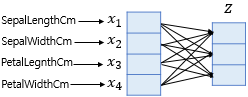

In [67]:
model = nn.Linear(4, 3)

# model.parameters() - 옵티마이저
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 학습수행
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)  # model
    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


In [69]:
list(model.parameters())  # 여기선 편향도 세개(이게 맞는듯)

[Parameter containing:
 tensor([[-3.1238, -0.3840,  2.2948, -0.5021],
         [ 0.5727, -0.2390, -0.5843,  1.2551],
         [ 2.4460,  0.3490, -1.9904, -0.1017]], requires_grad=True),
 Parameter containing:
 tensor([-2.1903, -1.1847,  3.4679], requires_grad=True)]

소프트맥스 회귀 클래스

In [71]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()            # 상속
    self.linear = nn.Linear(4,3)  # Linear

  def forward(self, x):
    return self.linear(x)

In [72]:
model = SoftmaxClassifierModel()

In [73]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)


# 학습수행
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 1.366217
Epoch  100/1000 Cost: 0.722726
Epoch  200/1000 Cost: 0.637564
Epoch  300/1000 Cost: 0.578576
Epoch  400/1000 Cost: 0.527363
Epoch  500/1000 Cost: 0.479315
Epoch  600/1000 Cost: 0.432700
Epoch  700/1000 Cost: 0.386693
Epoch  800/1000 Cost: 0.340930
Epoch  900/1000 Cost: 0.295757
Epoch 1000/1000 Cost: 0.255350


## 5) 소프트맥스 회귀로 MNIST 데이터 분류하기

- MNIST 데이터셋 : 0 ~ 9 - 손글씨

![](https://wikidocs.net/images/page/60324/mnist.png)

- [참고] torchvision : 데이터셋, 유명 모델, 이미지 전처리 툴 패키지
    - torchtext : 자연어처리



In [76]:
import PIL
PIL.__version__

'9.2.0'

In [80]:
# 라이브러리
import torch
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [82]:
# GPU 확인
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

False
다음 기기로 학습합니다: cpu


In [83]:
# 랜덤시드
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [84]:
# 하이퍼 파라미터
training_epochs = 15
batch_size = 100

- 데이터셋

In [85]:
# import torchvision.datasets as dsets
mnist_train = dsets.MNIST(
    root='MNIST_data/', # 다운로드 받을 경로
    train=True, # 학습 이미지
    
    transform=transforms.ToTensor(), #transforms함수를 이용해 텐서화
    download=True # 해당경로에 데이터 없으면 다운로드
)
mnist_test = dsets.MNIST(
    root='MNIST_data/',
    train=False, # 테스트 이미지
    
    transform=transforms.ToTensor(), #transforms함수를 이용해 텐서화
    download=True # 해당경로에 데이터 없으면 다운로드
)

100.0%


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100.0%


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



100.0%


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100.0%

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [102]:
len(mnist_test)

10000

In [110]:
mnist_test[0][0].shape

torch.Size([1, 28, 28])

In [115]:
mnist_test[0][1]

7

In [112]:
len(mnist_train)

60000

In [118]:
len(mnist_train[0]) # 데이터와 라벨로 구성

2

In [113]:
mnist_test[0][0].shape

torch.Size([1, 28, 28])

In [86]:
# 데이터로더

data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,  # 100
    shuffle=True,
    drop_last=True          # 남는 배치를 버림
)

- 모델 설계

In [87]:
linear = nn.Linear(28*28, 10, bias=True).to(device) 
# to() : 연산을 어디서 할지 정함
# bias=True : 편향사용

In [121]:
# 비용함수 및 옵티마이저
criterion = nn.CrossEntropyLoss().to(device) #F.cross_entropy와 같음
optimizer = optim.SGD(linear.parameters(), lr=0.1)

In [122]:
# 600 * 100(배치사이즈) = 60,000 

len(data_loader)

600

In [123]:
# 학습수행

for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0                     # 평균 cost
    total_batch = len(data_loader)   # 배치 횟수 (이터레이션)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)        
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch  # 평균계산

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534904599
Epoch: 0002 cost = 0.359224528
Epoch: 0003 cost = 0.331312239
Epoch: 0004 cost = 0.316804200
Epoch: 0005 cost = 0.306971818
Epoch: 0006 cost = 0.300353289
Epoch: 0007 cost = 0.294713527
Epoch: 0008 cost = 0.290886700
Epoch: 0009 cost = 0.287355423
Epoch: 0010 cost = 0.284247369
Epoch: 0011 cost = 0.281785160
Epoch: 0012 cost = 0.279580086
Epoch: 0013 cost = 0.277752191
Epoch: 0014 cost = 0.275903732
Epoch: 0015 cost = 0.274387121
Learning finished


- 모델 테스트

Accuracy: 0.8878999948501587
Label:  1
Prediction:  1


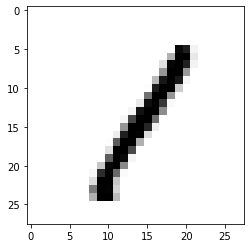

In [137]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    # 학습을 수행할 필요없이 출력값을 argmax하여 비교
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, dim = 1) == Y_test
    
    # 정확도 계산
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    # test_data
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    # test_labels
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, dim = 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [131]:
correct_prediction.float()

tensor([1., 1., 1.,  ..., 1., 0., 1.])

In [134]:
mnist_test.test_data[r:r + 1].shape

torch.Size([1, 28, 28])

In [135]:
mnist_test.test_data[r].shape

torch.Size([28, 28])